<a href="https://colab.research.google.com/github/Doubles2/LDCC/blob/master/Keras/part2_chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mnist 예제
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 2,
                input_dim = 28*28,
                activation = 'relu'))

model.add(Dense(units = 10,
                activation = 'softmax'))

In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [9]:
# 4. 모델 학습시키기 - erachstopping 적용
from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 감소되다가 증가되자마자 학습을 종료시킴
early_stopping = EarlyStopping(patience = 30) # patient를 사용하면 지정된 epoch까지는 training함
hist = model.fit(x_train,
                 y_train,
                 epochs = 3000,
                 batch_size = 10,
                 validation_data = (x_val, y_val),
                 callbacks = [early_stopping]
                 )

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 175us/step - loss: 1.8660 - acc: 0.2371 - val_loss: 1.9017 - val_acc: 0.2067
Epoch 2/3000
700/700 [==============================] - 0s 149us/step - loss: 1.8609 - acc: 0.2386 - val_loss: 1.9034 - val_acc: 0.2000
Epoch 3/3000
700/700 [==============================] - 0s 147us/step - loss: 1.8556 - acc: 0.2414 - val_loss: 1.9018 - val_acc: 0.2033
Epoch 4/3000
700/700 [==============================] - 0s 151us/step - loss: 1.8510 - acc: 0.2286 - val_loss: 1.8949 - val_acc: 0.2200
Epoch 5/3000
700/700 [==============================] - 0s 149us/step - loss: 1.8469 - acc: 0.2429 - val_loss: 1.8916 - val_acc: 0.2000
Epoch 6/3000
700/700 [==============================] - 0s 154us/step - loss: 1.8429 - acc: 0.2386 - val_loss: 1.8841 - val_acc: 0.2067
Epoch 7/3000
700/700 [==============================] - 0s 139us/step - loss: 1.8375 - acc: 0.2257 - val_loss: 1.8849 - val_acc: 0.2033
Ep

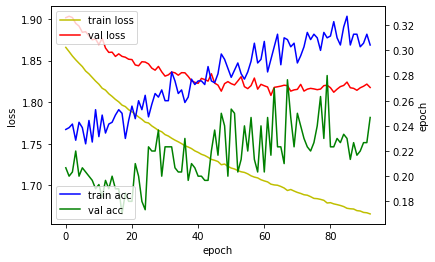

In [10]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],
             'y',
             label = 'train loss')

loss_ax.plot(hist.history['val_loss'],
             'r',
             label = 'val loss')

acc_ax.plot(hist.history['acc'],
             'b',
             label = 'train acc')

acc_ax.plot(hist.history['val_acc'],
             'g',
             label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('epoch')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [11]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)
print('')
print('loss : ', str(loss_and_metrics[0]))
print('accuracy : ', str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 19us/step

loss :  1.8396679862976075
accuracy :  0.2752
